In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#!unzip /content/drive/MyDrive/Colab/dataset.zip

**Importing the Dependencies**

In [1]:
import os
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import glob
import shutil
import cv2 
from PIL import Image
import PIL
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from sklearn.model_selection import train_test_split


import warnings
# Ignore waring
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D


without mask  -->  0

with mask  -->  1

incorected mask  -->  2



In [3]:
name_list = glob.glob("/content/dataset/without_mask/*")

In [4]:

X = []
y = []
for name in name_list:
  img = cv2.imread(name)
  #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(128,128))
  X.append((img))
  y.append(0)
len(X)


2994

In [5]:
name_list = glob.glob("/content/dataset/with_mask/*")

In [6]:
for name in name_list:
  img = cv2.imread(name)
  #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(128,128))
  X.append((img))
  y.append(1)
len(X)

5937

In [7]:
name_list = glob.glob("/content/dataset/mask_weared_incorrect/*")

In [8]:
for name in name_list:
  img = cv2.imread(name)
  #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(128,128))
  X.append((img))
  y.append(2)
len(X)

8931

In [9]:
# np.array
X = np.array(X)/255.
y = np.array(y)

**Displaying the Images**

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [10]:
X[0].shape

(128, 128, 3)

In [11]:
print(X.shape)
print(y.shape)

(8931, 128, 128, 3)
(8931,)


In [12]:
print(y)

[0 0 0 ... 2 2 2]


**Train Test Split**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(8931, 128, 128, 3) (7144, 128, 128, 3) (1787, 128, 128, 3)


**Building a Convolutional Neural Networks (CNN)**

Chuẩn hóa dữ liệu output:

In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(y_train.reshape(-1,1))
y_train = encoder.transform(y_train.reshape(-1,1)).toarray()
y_test = encoder.transform(y_test.reshape(-1,1)).toarray()
print(y_train)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


Xây dựng mô hình CNN:

In [18]:
inp = Input(shape = (128,128,3))
cnn = Conv2D(filters =10,kernel_size = 3,activation ='relu')(inp)
pooling = MaxPooling2D(pool_size =(2,2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = Conv2D(filters =18,kernel_size = 4,activation ='relu')(inp)
pooling = MaxPooling2D(pool_size =(2,2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = Conv2D(filters =32, kernel_size =4,activation ='relu')(drop)
pooling = MaxPooling2D(pool_size =(2,2))(cnn)
drop = Dropout(0.2)(pooling)

f =Flatten()(pooling)

fc1 = Dense(units =32, activation ='relu')(f)
fc2 = Dense(units =16, activation ='relu')(fc1)
out = Dense(units =3, activation ='softmax')(fc2)

model =Model(inputs = inp,outputs =out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 18)      882       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 18)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 18)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                         

Huấn luyện mô hình:

In [19]:
optimizer1 = tensorflow.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = optimizer1, loss = 'categorical_crossentropy',metrics =['accuracy'])

history = model.fit(X_train,y_train,batch_size =16, epochs =50,validation_data =(X_test,y_test))

Epoch 1/50
447/447 [==============================] - 22s 19ms/step - loss: 0.6211 - accuracy: 0.7203 - val_loss: 0.4404 - val_accuracy: 0.8881
Epoch 2/50
447/447 [==============================] - 4s 10ms/step - loss: 0.3052 - accuracy: 0.8942 - val_loss: 0.3101 - val_accuracy: 0.8825
Epoch 3/50
447/447 [==============================] - 5s 11ms/step - loss: 0.2220 - accuracy: 0.9204 - val_loss: 0.2285 - val_accuracy: 0.9138
Epoch 4/50
447/447 [==============================] - 4s 9ms/step - loss: 0.1748 - accuracy: 0.9399 - val_loss: 0.1987 - val_accuracy: 0.9317
Epoch 5/50
447/447 [==============================] - 4s 9ms/step - loss: 0.1634 - accuracy: 0.9416 - val_loss: 0.1597 - val_accuracy: 0.9508
Epoch 6/50
447/447 [==============================] - 5s 10ms/step - loss: 0.1331 - accuracy: 0.9559 - val_loss: 0.1509 - val_accuracy: 0.9496
Epoch 7/50
447/447 [==============================] - 4s 10ms/step - loss: 0.1179 - accuracy: 0.9611 - val_loss: 0.1418 - val_accuracy: 0.9485


**Model Evaluation**

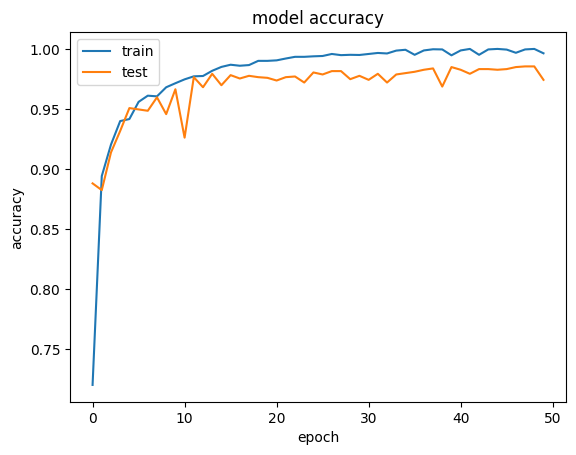

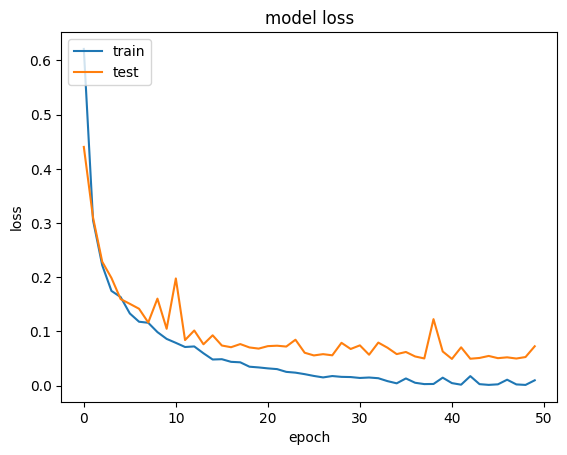

In [20]:
from matplotlib import pyplot  as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()

In [ ]:
model.save('model2.h5')

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('/content/model2.h5')

In [17]:
from sklearn.metrics import classification_report
y_hat = model1.predict(X_test)
y_test1 =np.argmax(y_test,axis =1)
y_hat1 = np.argmax(y_hat,axis =1)
print(classification_report(y_test1, y_hat1))

56/56 [==============================] - 8s 7ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       640
           1       0.99      0.95      0.97       561
           2       0.97      0.98      0.98       586

    accuracy                           0.97      1787
   macro avg       0.97      0.97      0.97      1787
weighted avg       0.97      0.97      0.97      1787



[[634   4   2]
 [ 14 532  15]
 [  8   3 575]]


<Axes: >

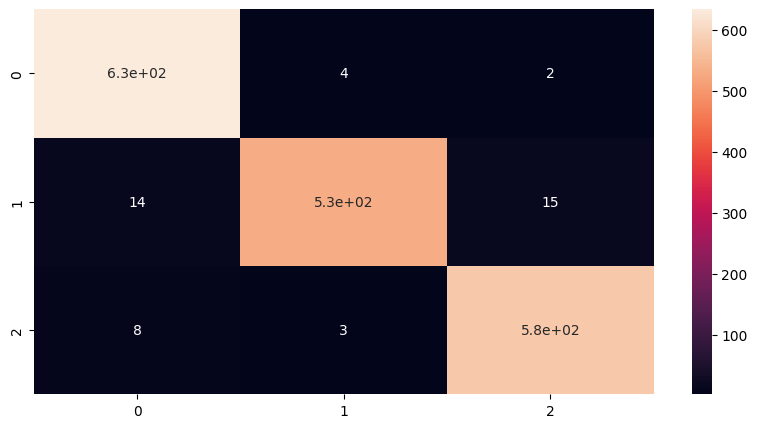

In [18]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as pyplot

matrix = confusion_matrix(y_test1,y_hat1)
print(matrix)
df_cm = pd.DataFrame(matrix, index = [i for i in "012"],columns = [i for i in "012"])
pyplot.figure(figsize = (10,5))
sn.heatmap(df_cm, annot=True)

(128, 128, 3)


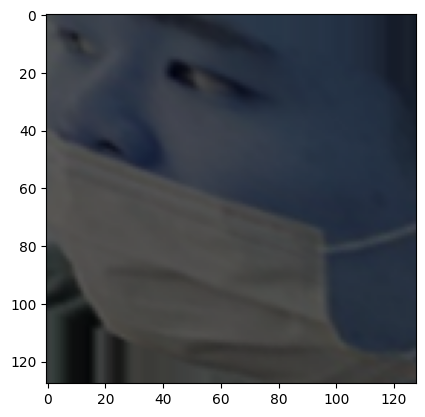

In [19]:
import cv2
img = cv2.imread('/content/dataset/mask_weared_incorrect/1006.png')
print(img.shape)
plt.imshow(img)

In [20]:
img_new = cv2.resize(img,(128,128))
img_scaled = np.array([img_new/255.])
print(img_scaled.shape)
y_hat = model1.predict(img_scaled)
print(y_hat)
for i in range(y_hat.shape[1]):
  max_value=np.max(y_hat)
  if y_hat[0][i]==max_value:
    y_hat[0][i]=1
  else:
    y_hat[0][i]=0
print(y_hat)
print(np.argmax(y_hat))

(1, 128, 128, 3)
1/1 [==============================] - 0s 90ms/step
[[1.9187434e-04 8.7816818e-03 9.9102646e-01]]
[[0. 0. 1.]]
2


(128, 128, 3)
(1, 128, 128, 3)
1/1 [==============================] - 0s 29ms/step
[[8.6477201e-07 9.9978286e-01 2.1630882e-04]]
[[0. 1. 0.]]
1


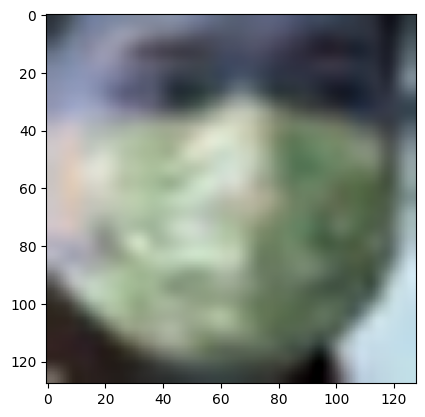

In [22]:
import cv2
img = cv2.imread('/content/dataset/with_mask/1046.png')
print(img.shape)
plt.imshow(img)
#gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_new = cv2.resize(img,(128,128))
#print(gray_img.shape)
#plt.imshow(img_new, cmap ='gray')
img_scaled = np.array([img_new/255.])
print(img_scaled.shape)
y_hat = model1.predict(img_scaled)
print(y_hat)
for i in range(y_hat.shape[1]):
  max_value=np.max(y_hat)
  if y_hat[0][i]==max_value:
    y_hat[0][i]=1
  else:
    y_hat[0][i]=0
print(y_hat)
print(np.argmax(y_hat))